In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('DataPreprocessingGraded_dataset.csv')
df = df.replace('?', np.nan)
df.sort_values('V4')

,V1,V2,V3,V4,V5,Target
47,2.0,2.0,500.0,2.0,NEGATIVE,NO
580,2.0,1.0,250.0,2.0,NEGATIVE,NO
153,2.0,1.0,250.0,2.0,NEGATIVE,YES
155,2.0,1.0,250.0,2.0,NEGATIVE,NO
156,2.0,1.0,250.0,2.0,NEGATIVE,NO
...,...,...,...,...,...,...
505,2.0,41.0,10250.0,98.0,NEGATIVE,YES
517,4.0,33.0,8250.0,98.0,NEGATIVE,YES
562,4.0,16.0,4000.0,98.0,NEGATIVE,YES
137,2.0,12.0,3000.0,98.0,NEGATIVE,NO


## Practice Assignment

In [3]:
df_nan = df.dropna(axis=0, how='any')
df_nan[['V1', 'V2']] = df_nan[['V1', 'V2']].astype(float)
df_nan.dtypes

C:\Program Files\KMSpico\temp\ipykernel_25864\3618002600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan[['V1', 'V2']] = df_nan[['V1', 'V2']].astype(float)


V1        float64
V2        float64
V3        float64
V4        float64
V5         object
Target     object
dtype: object

In [4]:
df_nan.describe()

,V1,V2,V3,V4
count,739.000000,739.000000,739.000000,739.000000
mean,9.598106,5.427605,1356.901218,34.304465
std,8.100624,5.776421,1444.105299,24.432765
min,0.000000,1.000000,250.000000,2.000000
25%,3.000000,2.000000,500.000000,16.000000
50%,8.000000,4.000000,1000.000000,28.000000
75%,14.000000,7.000000,1750.000000,50.000000
max,74.000000,50.000000,12500.000000,98.000000


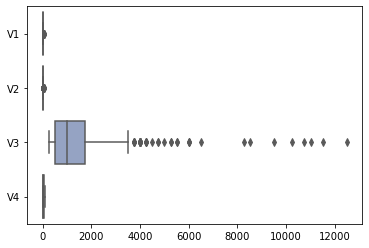

In [5]:
ax = sns.boxplot(data=df_nan, orient="h", palette="Set2")

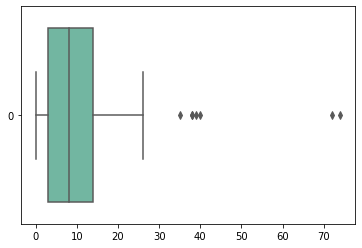

In [6]:
ax = sns.boxplot(data=df_nan.V1, orient="h", palette="Set2")

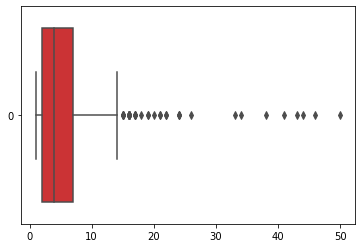

In [7]:
ax = sns.boxplot(data=df_nan.V2, orient="h", palette="Set1")

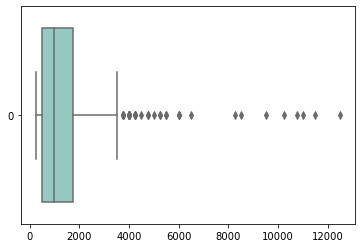

In [8]:
ax = sns.boxplot(data=df_nan.V3, orient="h", palette="Set3")

In [9]:
df['Target'].value_counts()

NO     570
YES    178
Name: Target, dtype: int64

In [10]:
df.dropna(axis=1, how='any')

,V3,V4,V5,Target
0,12500.0,98.0,NEGATIVE,YES
1,3250.0,28.0,NEGATIVE,YES
2,4000.0,35.0,NEGATIVE,YES
3,5000.0,45.0,NEGATIVE,YES
4,6000.0,77.0,NEGATIVE,NO
...,...,...,...,...
743,500.0,38.0,NEGATIVE,NO
744,500.0,52.0,NEGATIVE,NO
745,750.0,62.0,NEGATIVE,NO
746,250.0,39.0,NEGATIVE,NO


In [11]:
df.isnull().sum(axis = 0)

V1        5
V2        5
V3        0
V4        0
V5        0
Target    0
dtype: int64

In [12]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(df[['V1']])
df_imputed_with = imputer.transform(df[['V1']])
df_imputed_with

array([[ 2.],
       [ 0.],
       [ 8.],
       [ 8.],
       [ 1.],
       [ 4.],
       [ 2.],
       [ 8.],
       [ 2.],
       [ 5.],
       [ 4.],
       [ 8.],
       [ 2.],
       [ 1.],
       [ 2.],
       [ 2.],
       [ 8.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 4.],
       [ 2.],
       [ 2.],
       [ 9.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 1.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 4.],
       [ 2.],
       [ 4.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 4.],
       [ 4.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 2.],
       [ 2.],
       [ 3.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 4.],
       [ 2.],
       [ 3.],
       [ 2.],
       [ 0.],
       [ 4.],
       [ 1.],
       [ 2.],
      

In [13]:
np.mean(df_imputed_with)

9.552139037433156

In [14]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(df[['V2']])
df_imputed_with = imputer.transform(df[['V2']])
# df_imputed_with
np.mean(df_imputed_with)

5.464333781965007

In [15]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()
imputer = imputer.fit(df[['V1']])
df_imputed_with = imputer.transform(df[['V1']])
# df_imputed_with
np.mean(df_imputed_with)

9.562584118438762

## Graded Assignment 

In [16]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold

num_pipeline = Pipeline([    
    ('selector', ColumnTransformer([(
        'select_first_4',
        'passthrough',
        slice(0, 4),
    )])),
    ('imputer', SimpleImputer(strategy='mean')),
    ('Std_scaler', StandardScaler()),
])
cat_pipeline = ColumnTransformer([('ordinal_encoder', OrdinalEncoder(), [4]),])
full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

### Q1

In [17]:
final = Pipeline([
    ('full', full_pipeline),
    ('var_thresh', VarianceThreshold(threshold=0.1))
])

from sklearn import set_config
set_config(display='diagram')

# displays HTML representation in a jupyter context
final

Pipeline(steps=[('full',
                 FeatureUnion(transformer_list=[('num_pipeline',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnTransformer(transformers=[('select_first_4',
                                                                                                   'passthrough',
                                                                                                   slice(0, 4, None))])),
                                                                 ('imputer',
                                                                  SimpleImputer()),
                                                                 ('Std_scaler',
                                                                  StandardScaler())])),
                                                ('cat_pipeline',
                                                 ColumnTransformer(transformers=[('ordinal_encoder',
                                                                                  OrdinalEncoder(),
                                                                                  [4])]))])),
                ('var_thresh', VarianceThreshold(threshold=0.1))])

In [20]:
features, label = df[['V1', 'V2', 'V3', 'V4', 'V5']], df.Target

In [21]:
transformed_data = final.fit_transform(features, label)
pd.DataFrame(transformed_data).describe().T

,count,mean,std,min,25%,50%,75%,max
0,748.0,-1.528189e-15,1.000669,-1.186278,-0.814115,-0.193845,0.550480,7.993724
1,748.0,-7.142237e-16,1.000669,-0.772851,-0.599734,-0.253501,0.265849,7.709867
2,748.0,1.015231e-16,1.000669,-0.773675,-0.602307,-0.259572,0.254532,7.623346
3,748.0,7.421277e-18,1.000669,-1.325186,-0.750483,-0.257881,0.645224,2.615633


### Q2

In [22]:
transformed_data = full_pipeline.fit_transform(features, label)
# transformed_data

In [24]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

estimator = LogisticRegression()
selector = RFE(estimator, n_features_to_select=2, step=1)
selector = selector.fit(transformed_data, label)

# support_attribute is a boolean array
# marking which features are selected
print(selector.support_)

# rank for each feature
# if it's value is '1', then it is selected
# features with rank 2 and onwards are ranked least
print(f'Rank of each feature is: {selector.ranking_}')

[ True False  True False False]
Rank of each feature is: [1 3 1 2 4]


### Q3

In [25]:
from sklearn.feature_selection import SequentialFeatureSelector

sfs = SequentialFeatureSelector(estimator, n_features_to_select=2)
sfs.fit_transform(transformed_data, label)
print(sfs.get_support())

[False  True False  True False]


### Q4

In [26]:
sfs = SequentialFeatureSelector(estimator, n_features_to_select=2, direction='backward')
sfs.fit_transform(transformed_data, label)
print(sfs.get_support())

[False False  True  True False]
